## Text Vectorization

In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv('dataset/final_cleaned.csv', usecols=['cleaned_text', 'sentiment'])
df.shape

(60000, 2)

In [3]:
df.head()

,sentiment,cleaned_text
0,1,sixteen year old border collie love food shes ...
1,1,bought pb pb chocolateand completely wonderful...
2,1,boyfriend love pancake always think different ...
3,1,mix three tablespoon morning smoothie protein ...
4,1,family love taco night dont make often enough ...


## Distribution of reviews length after cleaning

In [4]:
plt.hist([len(s.split()) for s in df['cleaned_text']], bins=bins)
plt.show()

NameError: name 'bins' is not defined

### Plotting average word cound in our cleaned text according to its sentiment

In [5]:
# getting average from our review words length according to their sentiment
positive_avg = df[df['sentiment'] ==1]['cleaned_text'].str.len().mean()
negetive_avg = df[df['sentiment'] ==0]['cleaned_text'].str.len().mean()

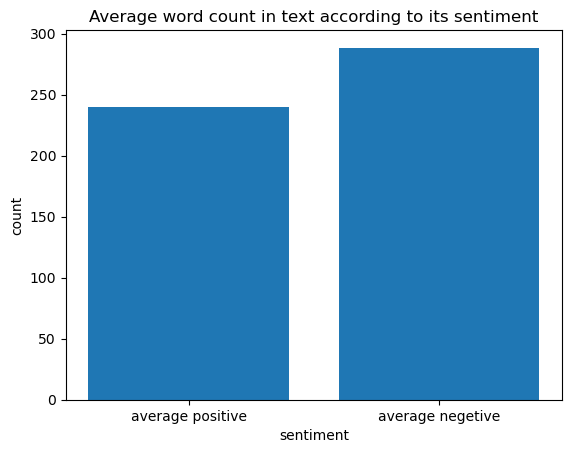

In [6]:
plt.bar(x=['average positive', 'average negetive'],height=[positive_avg,negetive_avg])
plt.title('Average word count in text according to its sentiment')
plt.ylabel('count')
plt.xlabel('sentiment')
plt.show()

### Using wordcloud to display top words in out corpus 

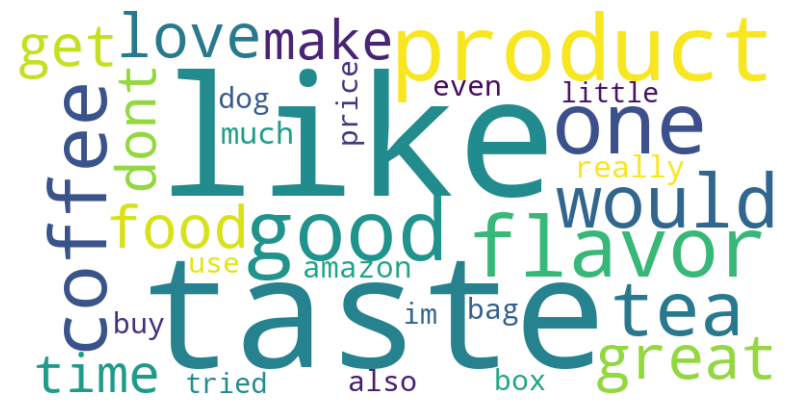

In [7]:
# /home/rojit/ubuntu/.

text = ' '.join(df['cleaned_text'])
tokens = word_tokenize(text)

word_frequencies = {}
for token in tokens:
    if token in word_frequencies:
        word_frequencies[token] += 1
    else:
        word_frequencies[token] = 1

sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

top_k = 30
top_k_words = dict(sorted_word_frequencies[:top_k])

wordcloud = WordCloud(width=800, height=400, background_color='white')

wordcloud.generate_from_frequencies(top_k_words)

# showing the plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Now, we are going to convert our cleaned text using Bag of words and TF-IDF.
* Train logictic regression and Random forest classifier on vector from BOW
* Train logictic regression and Random forest classifier on vector from TF-IDF

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Bag of words

In [10]:
bow_vectorizer = CountVectorizer()
bow = bow_vectorizer.fit_transform(df['cleaned_text'])

In [11]:
bow.get_shape()

(60000, 59947)

In [12]:
# inspecting the first item from out bow
bow[0].toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
# total vocabulary length from out cleaned text
len(bow_vectorizer.vocabulary_)

59947

In [19]:
# getting and printing top 50 features from our bag of words
feature_names = bow_vectorizer.get_feature_names_out()
feature_names[:50]

array(['aa', 'aaah', 'aadmit', 'aadp', 'aafco', 'aafes',
       'aakaufmanerthlinknet', 'aamazoni', 'aap', 'aarthur', 'aaworld',
       'ab', 'aback', 'abalone', 'abandon', 'abandoned', 'abandoning',
       'abated', 'abbaye', 'abbazabba', 'abbey', 'abbott', 'abbreviated',
       'abbreviating', 'abby', 'abc', 'abcstores', 'abctoyme', 'abd',
       'abdomen', 'abdominal', 'aber', 'aberdeen', 'aberrant',
       'aberration', 'abet', 'abetter', 'abfab', 'abhor', 'abhorrent',
       'abi', 'abide', 'abides', 'abietate', 'abigirl', 'ability', 'abit',
       'abject', 'ablation', 'able'], dtype=object)

### BOW (logictic regression)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(bow, df['sentiment'], test_size=0.2, random_state=42)

In [21]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\rojit\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
lr_bow_y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, lr_bow_y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8565833333333334


In [25]:
print(classification_report(y_test, lr_bow_y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      6091
           1       0.85      0.86      0.86      5909

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.86      0.86      0.86     12000



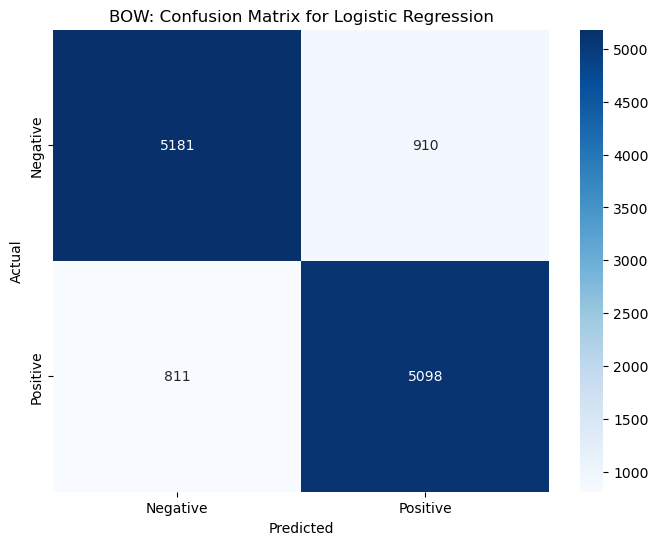

In [37]:
cm_lr_bow = confusion_matrix(y_test, lr_bow_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr_bow, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('BOW: Confusion Matrix for Logistic Regression')
plt.show()

### BOW (Random forest classifier)

In [27]:
bow_rf = RandomForestClassifier()
bow_rf.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
bow_rf_pred = bow_rf.predict(X_test)
accuracy = accuracy_score(y_test, bow_rf_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8493333333333334


In [32]:
print(classification_report(y_test, bow_rf_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      6091
           1       0.87      0.82      0.84      5909

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000



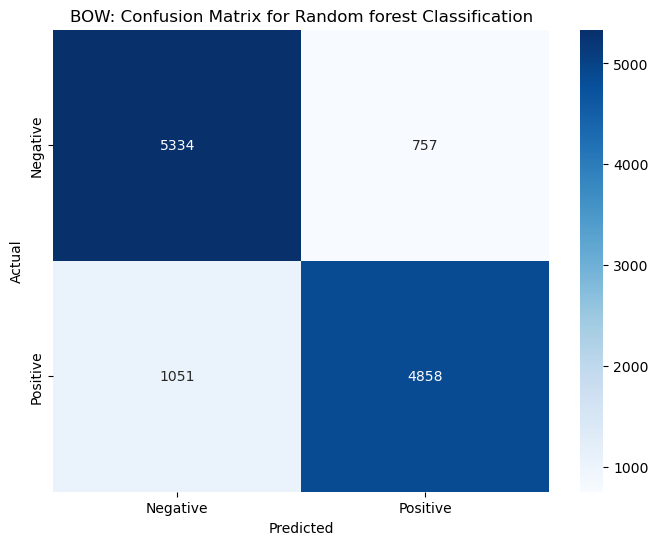

In [36]:
cm_lr_bow = confusion_matrix(y_test, bow_rf_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr_bow, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('BOW: Confusion Matrix for Random forest Classification')
plt.show()

# TF-IDF

In [38]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])

In [39]:
tfidf.get_shape()

(60000, 1116251)

In [40]:
# we can again get the features names as we did with bag of words
tfidf_vectorizer.get_feature_names_out()[:50]

array(['aa', 'aa big', 'aa coffee', 'aa dark', 'aa didnt', 'aa extra',
       'aa ground', 'aa hawaiian', 'aa known', 'aa louisiana', 'aa may',
       'aa nutramigen', 'aa offering', 'aa person', 'aa quality',
       'aa smooth', 'aa sumatran', 'aa tolerating', 'aa tree', 'aa work',
       'aaah', 'aaah gluten', 'aadmit', 'aadmit reading', 'aadp', 'aafco',
       'aafco also', 'aafco cat', 'aafco country', 'aafco definition',
       'aafco guideline', 'aafes', 'aafes came', 'aakaufmanerthlinknet',
       'aamazoni', 'aamazoni bought', 'aap', 'aap say', 'aarthur',
       'aarthur allpurpose', 'aaworld', 'aaworld green', 'ab', 'ab grade',
       'ab hair', 'ab help', 'ab positive', 'ab taste', 'ab test',
       'ab textured'], dtype=object)

In [41]:
len(tfidf_vectorizer.vocabulary_)

1116251

## TF-IDF => Logistic Regression

In [43]:
X_train, X_test, y_train, y_test = train_test_split(tfidf, df['sentiment'], test_size=0.2, random_state=42)

In [44]:
lr_tfidf = LogisticRegression()
lr_tfidf.fit(X_train, y_train)

LogisticRegression()

In [45]:
lr_tfidf_y_pred = lr_tfidf.predict(X_test)

In [46]:
accuracy = accuracy_score(y_test, lr_tfidf_y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8710833333333333


#### Logictic regression classification report 

In [47]:
print(classification_report(y_test, lr_tfidf_y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      6091
           1       0.88      0.86      0.87      5909

    accuracy                           0.87     12000
   macro avg       0.87      0.87      0.87     12000
weighted avg       0.87      0.87      0.87     12000



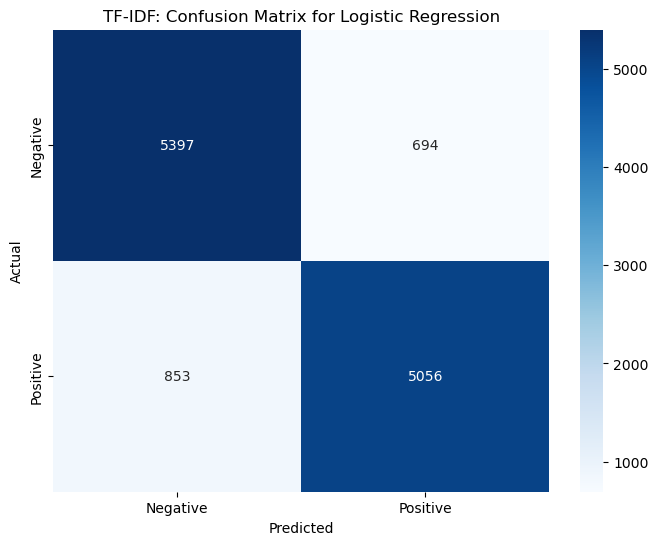

In [49]:
cm_rf = confusion_matrix(y_test, lr_tfidf_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('TF-IDF: Confusion Matrix for Logistic Regression')
plt.show()

### TF-IDF Random Forest

In [50]:
# Random Forest
tfidf_rf = RandomForestClassifier()
tfidf_rf.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
tfidf_rf_pred = tfidf_rf.predict(X_test)

In [52]:
tfidf_rf_accuracy = accuracy_score(y_test, tfidf_rf_pred)
tfidf_rf_accuracy

0.8414166666666667

In [54]:
print(classification_report(y_test, tfidf_rf_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      6091
           1       0.86      0.81      0.83      5909

    accuracy                           0.84     12000
   macro avg       0.84      0.84      0.84     12000
weighted avg       0.84      0.84      0.84     12000



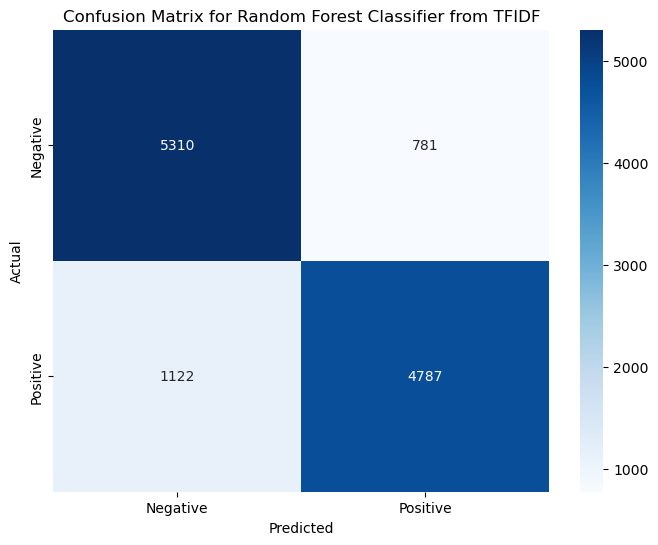

In [55]:
cm_rf = confusion_matrix(y_test, tfidf_rf_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier from TFIDF')
plt.show()